<a href="https://colab.research.google.com/github/valentinamgavirira/analitica-/blob/main/PARCIAL1ANALITICA2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importar librerias
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import export_graphviz
import graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image
from sklearn.naive_bayes import MultinomialNB


In [ ]:
# Cargar la base de datos de Excel
file_path = "/content/4. BD1_Longitudinal Survey_L_Int.xlsx"
df = pd.read_excel(file_path)

In [ ]:
# Seleccionar variables necesarias
columns_needed = ["Age", "Mother_Edu", "Father_Edu", "FamilySize", "Self_Esteem", "Height", "Weight", "Income", "HealthPlan"]
df_selected = df[columns_needed].dropna()

In [ ]:
# Contar personas con y sin HealthPlan
num_inscritas = df_selected[df_selected["HealthPlan"] == 1].shape[0]
num_no_inscritas = df_selected[df_selected["HealthPlan"] == 0].shape[0]
print(f"Número de personas inscritas en HealthPlan: {num_inscritas}")
print(f"Número de personas no inscritas en HealthPlan: {num_no_inscritas}")

Número de personas inscritas en HealthPlan: 5110
Número de personas no inscritas en HealthPlan: 853


In [ ]:
# Eliminar valores nulos
df_selected = df_selected.dropna()

In [ ]:
print(f"Total de registros antes de limpieza: {len(df)}")
print(f"Total de registros después de limpieza: {len(df_selected)}")

Total de registros antes de limpieza: 12686
Total de registros después de limpieza: 5963


In [ ]:
X = df_selected.drop(columns=["HealthPlan"])
y = df_selected["HealthPlan"]

In [ ]:
# Aplicar SMOTE para balancear las clases
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

In [ ]:
mnb = GaussianNB()
mnb.fit(X_train, y_train)
ct = mnb.class_count_
print("El total de los datos: ", len(X_train))
print("Los datos porcentualmente están divididos: ", ct / len(X_train))
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)
accuracy_nb = accuracy_score(y_test, y_pred_nb)

# Implementación del Modelo Árbol de Decisión (con máximo 4 niveles)
dt_model = DecisionTreeClassifier(max_depth=4, class_weight="balanced", random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)

El total de los datos:  8176
Los datos porcentualmente están divididos:  [0.50489237 0.49510763]


In [ ]:
# Cálculo de métricas de desempeño para el arbol de decision
cm = confusion_matrix(y_test, y_pred_dt)
VP = cm[1, 1]  # Verdaderos Positivos
VN = cm[0, 0]  # Verdaderos Negativos
FP = cm[0, 1]  # Falsos Positivos
FN = cm[1, 0]  # Falsos Negativos

Exactitud = (VP + VN) / (VP + VN + FP + FN)
Sensibilidad = VP / (VP + FN)
Especificidad = VN / (VN + FP)
Precision = VP / (VP + FP)
TasaError = (FP + FN) / (VP + VN + FP + FN)
PredNeg = VN / (VN + FN) if (VN + FN) != 0 else 0

# Mostrar métricas
print("Matriz de Confusión:")
print(cm)
print("Exactitud:", Exactitud)
print("Sensibilidad:", Sensibilidad)
print("Especificidad:", Especificidad)
print("Precisión:", Precision)
print("Tasa de Error:", TasaError)
print("Tasa de Predicción Negativa:", PredNeg)

Matriz de Confusión:
[[620 362]
 [193 869]]
Exactitud: 0.7284735812133072
Sensibilidad: 0.8182674199623352
Especificidad: 0.6313645621181263
Precisión: 0.7059301380991064
Tasa de Error: 0.27152641878669276
Tasa de Predicción Negativa: 0.7626076260762608


In [ ]:
# Cálculo de métricas de desempeño para Naive Bayes
nb_cm = confusion_matrix(y_test, y_pred_nb)
nb_VP = nb_cm[1, 1]  # Verdaderos Positivos
nb_VN = nb_cm[0, 0]  # Verdaderos Negativos
nb_FP = nb_cm[0, 1]  # Falsos Positivos
nb_FN = nb_cm[1, 0]  # Falsos Negativos

Exactitud_nb = (nb_VP + nb_VN) / (nb_VP + nb_VN + nb_FP + nb_FN)
Sensibilidad_nb = nb_VP / (nb_VP + nb_FN)
Especificidad_nb = nb_VN / (nb_VN + nb_FP)
Precision_nb = nb_VP / (nb_VP + nb_FP)
TasaError_nb = (nb_FP + nb_FN) / (nb_VP + nb_VN + nb_FP + nb_FN)
PredNeg_nb = nb_VN / (nb_VN + nb_FN) if (nb_VN + nb_FN) != 0 else 0
# Mostrar métricas para Naive Bayes
print("Matriz de Confusión - Naive Bayes:")
print(nb_cm)
print("Exactitud Naive Bayes:", Exactitud_nb)
print("Sensibilidad Naive Bayes:", Sensibilidad_nb)
print("Especificidad Naive Bayes:", Especificidad_nb)
print("Precisión Naive Bayes:", Precision_nb)
print("Tasa de Error Naive Bayes:", TasaError_nb)
print("Tasa de Predicción Negativa Naive Bayes:", PredNeg_nb)

Matriz de Confusión - Naive Bayes:
[[857 125]
 [514 548]]
Exactitud Naive Bayes: 0.6873776908023483
Sensibilidad Naive Bayes: 0.5160075329566854
Especificidad Naive Bayes: 0.8727087576374746
Precisión Naive Bayes: 0.8142644873699851
Tasa de Error Naive Bayes: 0.31262230919765166
Tasa de Predicción Negativa Naive Bayes: 0.62509117432531


In [ ]:
# Comparación de modelos y selección del mejor
mejor_modelo = "Naive Bayes" if accuracy_nb > accuracy_dt else "Árbol de Decisión"
print(f"El mejor modelo según la exactitud es: {mejor_modelo}")

El mejor modelo según la exactitud es: Árbol de Decisión


In [ ]:
XD = np.array(X_resampled)

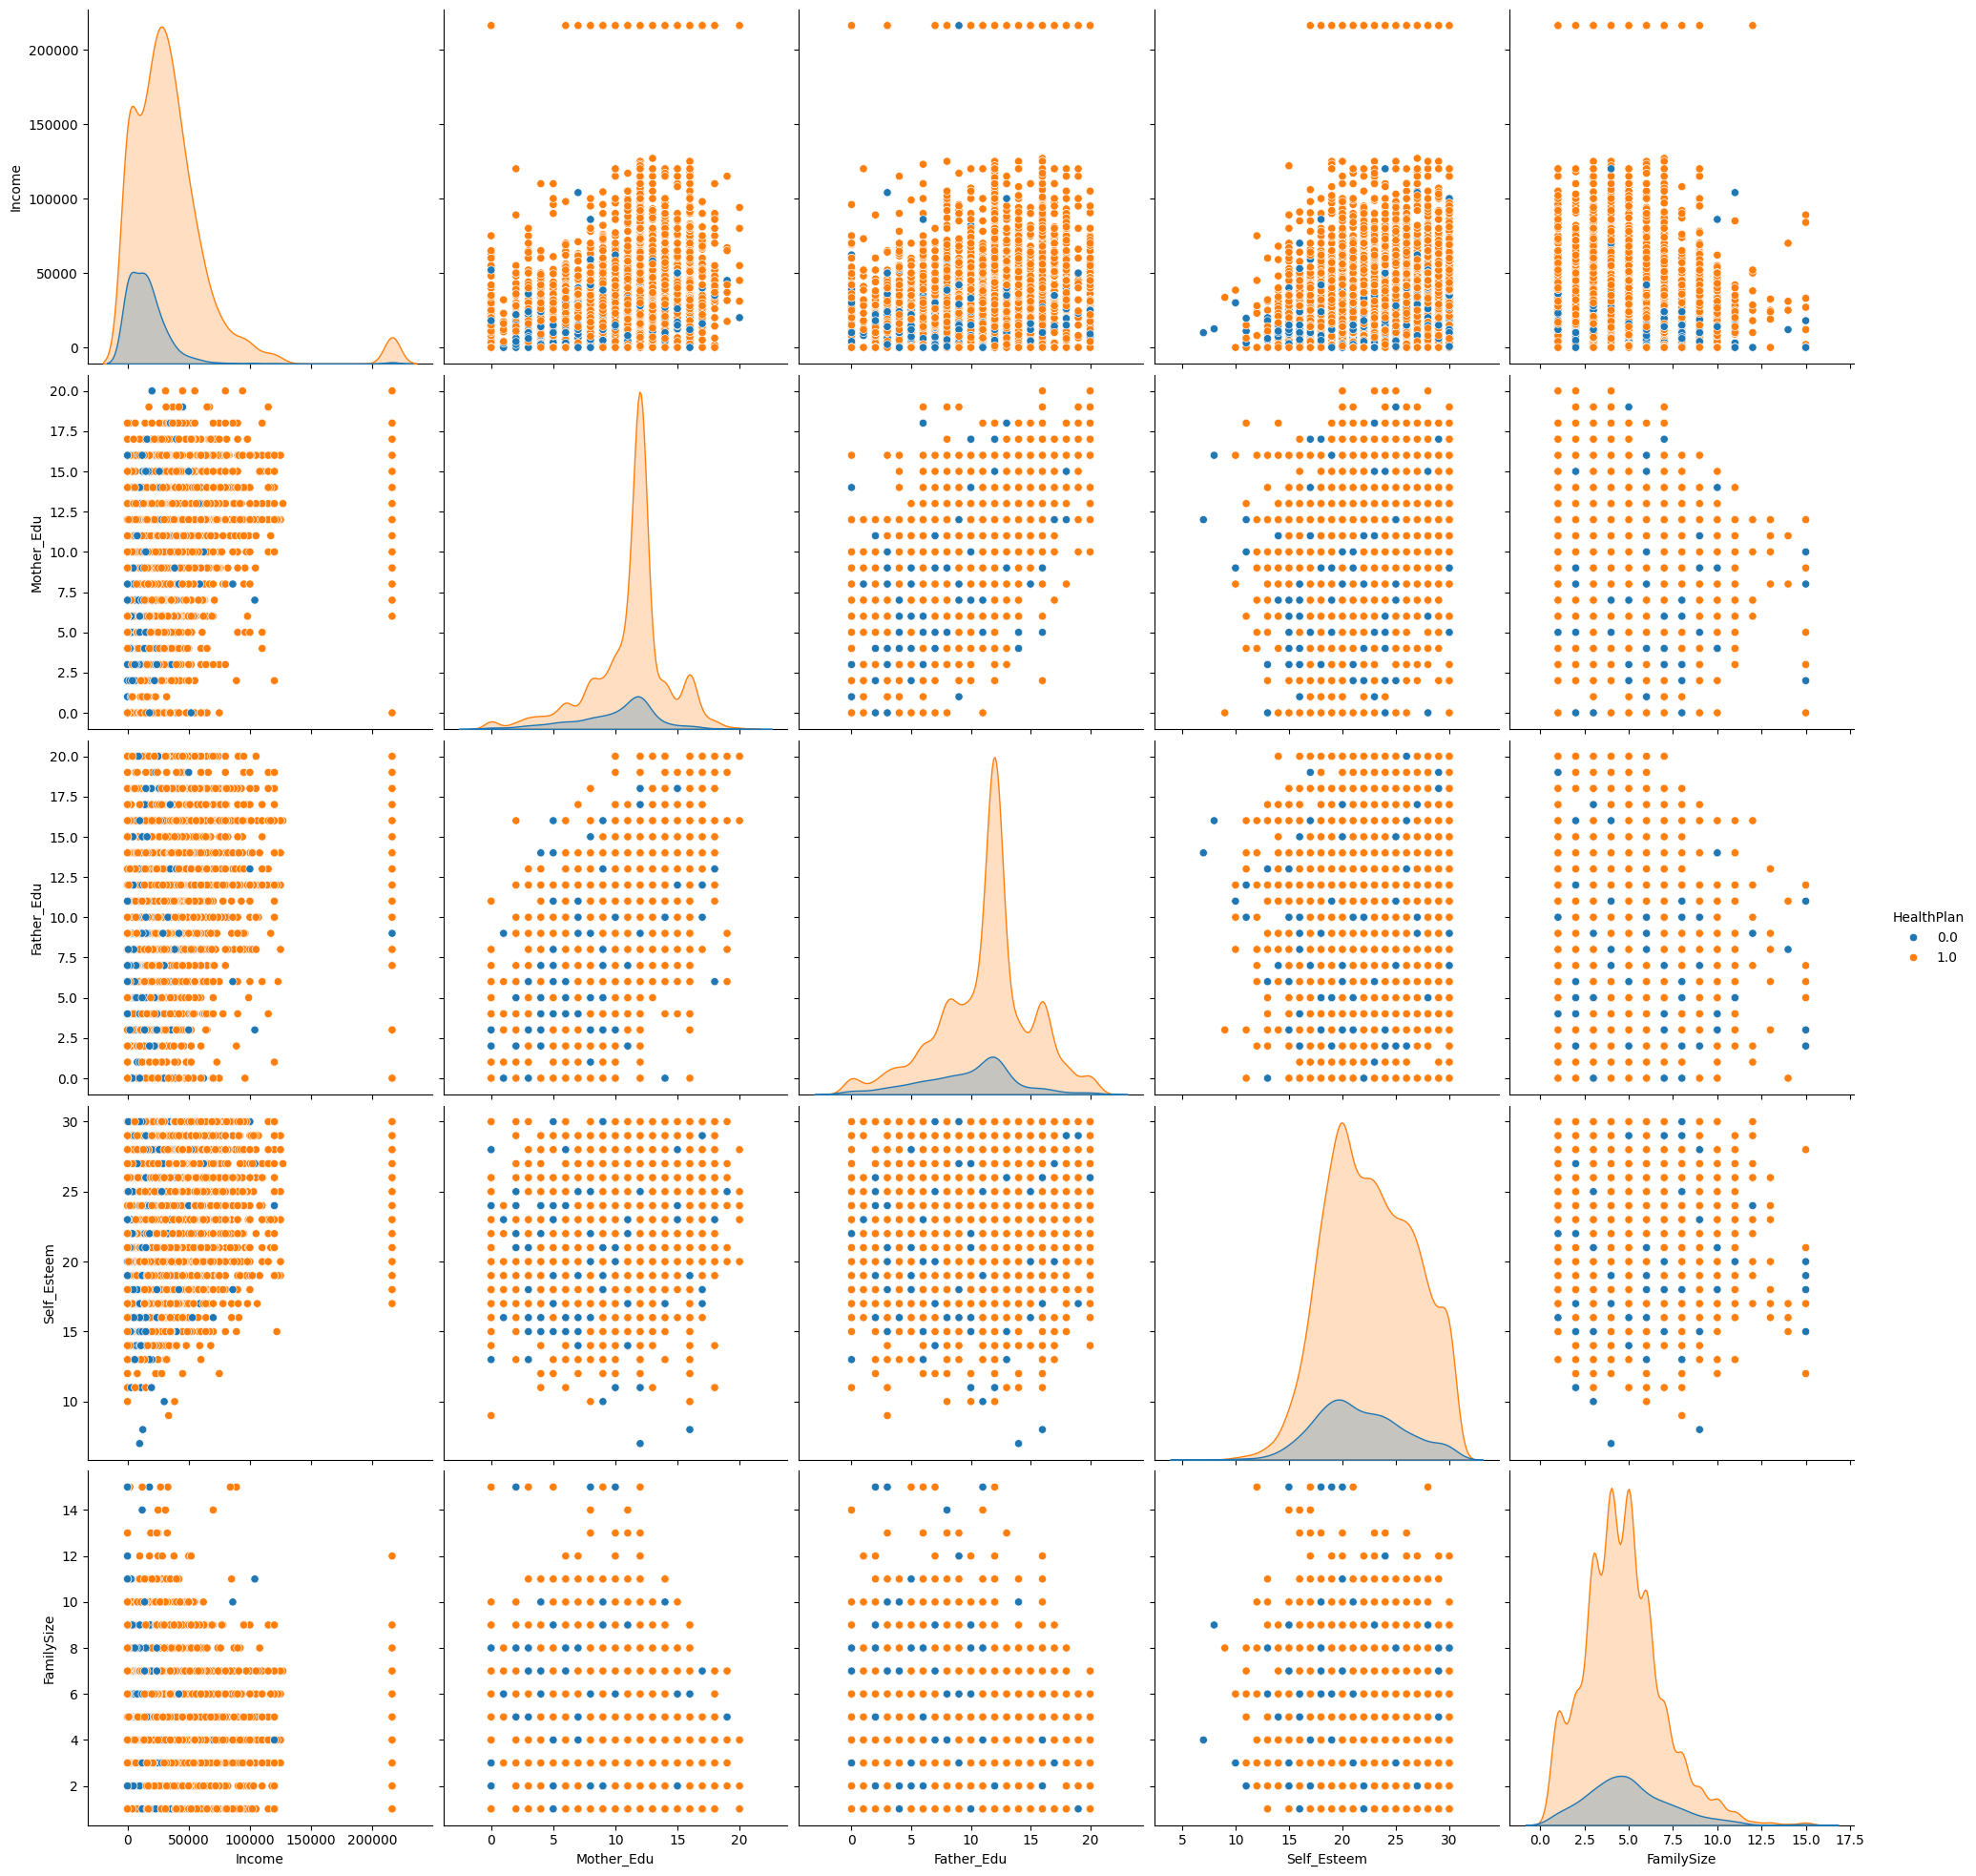

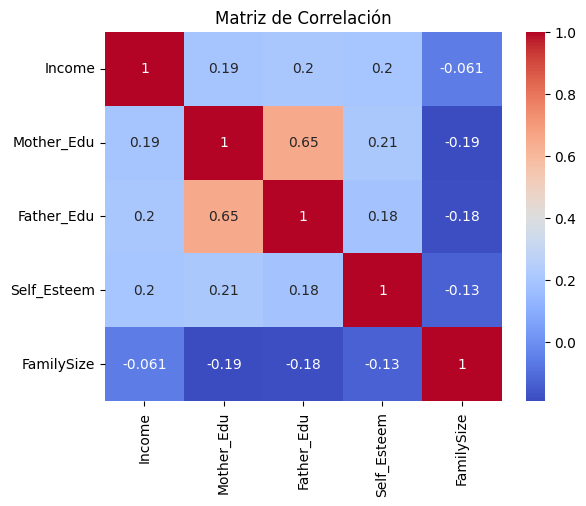

KMeans(init='random', n_clusters=5, random_state=42)

In [ ]:
correlation_matrix = df_selected.corr()
top_5_vars = correlation_matrix['HealthPlan'].abs().sort_values(ascending=False).index[1:6]  # Seleccionar las 5 variables más correlacionadas
sns.pairplot(df_selected, hue='HealthPlan', height=4, vars=top_5_vars)
plt.figure()
sns.heatmap(df_selected[top_5_vars].corr(), annot=True, cmap='coolwarm')
plt.title("Matriz de Correlación")
plt.show()

np.random.seed(42)  # Se generan los mismos números aleatorios
NC = 5  # Número de Clusters (del 1 al 5 siendo 1 muy bajo y 5 muy alto)
mkm = KMeans(n_clusters=NC, init='random', random_state=42)
mkm.fit(XD)

In [ ]:
# Mostrar los centroides de los clusters
dfc = pd.DataFrame(mkm.cluster_centers_)
dfc.columns = X.columns
print("Centroides de los Clusters:")
display(dfc)


Centroides de los Clusters:


Age  Mother_Edu  Father_Edu  FamilySize  Self_Esteem     Height  \
0  18.316602   12.417378   12.777217    4.393822    24.220312  69.038818   
1  18.085447   10.407276   10.340905    4.547685    21.911315  66.983223   
2  18.544118   12.945914   13.087223    4.139706    24.477812  69.515784   
3  18.090231   10.294419    9.925025    4.810540    21.273767  65.937571   
4  18.242187   11.386144   11.374199    4.441895    23.126802  68.152306   

       Weight         Income  
0  153.801499   84504.694305  
1  145.380343   22347.175434  
2  161.058625  215452.648691  
3  140.650624    4015.684668  
4  151.532679   45049.209892

In [ ]:
# Asignar cada persona a un cluster
ydc = mkm.predict(XD)
print("Los clusters a los que pertenecen las personas son:\n", ydc)

Los clusters a los que pertenecen las personas son:
 [3 4 1 ... 4 3 3]


In [ ]:
#Determinar a la categoría a la que pertenece una persona con características dadas
# Persona con características socioeconómicas [18,12,12,5,28,71,180,48000]
data_point = np.array([[18,12,12,5,28,71,180,48000]])
pred_nb = nb_model.predict(data_point)
pred_dt = dt_model.predict(data_point)

print("Categoría predicha por Naive Bayes:", pred_nb[0])
print("Categoría predicha por Árbol de Decisión:", pred_dt[0])
probabilidades = mar.predict_proba(data_point)
print("Probabilidades de pertenecer a cada categoría:", probabilidades)

Categoría predicha por Naive Bayes: 1.0
Categoría predicha por Árbol de Decisión: 1.0
Probabilidades de pertenecer a cada categoría: [[0.03655462 0.96344538]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
proba_nb = nb_model.predict_proba(data_point)
proba_dt = dt_model.predict_proba(data_point)

print("Probabilidad de pertenecer a cada categoría según Naive Bayes:", proba_nb)
print("Probabilidad de pertenecer a cada categoría según Árbol de Decisión:", proba_dt)


Probabilidad de pertenecer a cada categoría según Naive Bayes: [[0.24851432 0.75148568]]
Probabilidad de pertenecer a cada categoría según Árbol de Decisión: [[0.11437506 0.88562494]]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [ ]:
# Exportar el árbol de decisión a un archivo DOT
dot_data = export_graphviz(dt_model, out_file=None, feature_names=X.columns.tolist(), filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph.render("DecisionTree")  # Guardará el árbol como DecisionTree.pdf

'DecisionTree.pdf'

otro metodo sin usar smote

In [ ]:
nxl='/content/4. BD1_Longitudinal Survey_L_Int.xlsx'
XDB=pd.read_excel(nxl,sheet_name=0)

XDB=XDB[['Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Height', 'Weight', 'Income','HealthPlan']]
XDB=XDB.dropna()

XD=XDB [['Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Height', 'Weight', 'Income']] #Aquí estan las variables de entrada
yd=XDB [['HealthPlan']]
yd = yd.values.ravel()

In [ ]:
mnb=GaussianNB()
mnb.fit(XD,yd)

ct=mnb.class_count_
print("Cómo están separados los datos", ct)
print("El total de los datos es:",len(XD))
print("**Los datos porcentualmente están divididos en:**\n",(ct/len(XD))*100)

u=mnb.theta_
print("**La media de las variables por categoría es:**\n",u)
std=mnb.var_
std=np.sqrt(std)
print("**La desviación estándar de las variables por categoría es:**\n",std)

print("**El límite superior de los valores es:**\n",u+std)
print("**El límite inferior de los valores es:**\n",u-std)

XS = pd.DataFrame([[18, 12, 12, 5, 28, 71, 180, 48000]], columns=['Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Height', 'Weight', 'Income'])
mnb.predict(XS)
print("**Una persona con dichas características pertenece a la categoría:**", mnb.predict(XS))

Cómo están separados los datos [ 853. 5110.]
El total de los datos es: 5963
**Los datos porcentualmente están divididos en:**
 [14.30488009 85.69511991]
**La media de las variables por categoría es:**
 [[1.82731536e+01 1.00539273e+01 9.79835873e+00 4.98124267e+00
  2.15439625e+01 6.68968347e+01 1.46289566e+02 1.64244736e+04]
 [1.83774951e+01 1.12438356e+01 1.12348337e+01 4.64559687e+00
  2.26039139e+01 6.69878669e+01 1.45515264e+02 3.52898006e+04]]
**La desviación estándar de las variables por categoría es:**
 [[2.47166531e+00 3.52070605e+00 4.15540015e+00 2.61554378e+00
  4.18019301e+00 4.16013764e+00 2.93967326e+01 2.15253706e+04]
 [2.47220497e+00 3.29361161e+00 4.03693012e+00 2.43738210e+00
  4.19558044e+00 4.18303630e+00 3.02652164e+01 3.63146146e+04]]
**El límite superior de los valores es:**
 [[2.07448189e+01 1.35746334e+01 1.39537589e+01 7.59678645e+00
  2.57241555e+01 7.10569723e+01 1.75686299e+02 3.79498442e+04]
 [2.08497001e+01 1.45374472e+01 1.52717638e+01 7.08297897e+00
  2

In [ ]:
ydp=mnb.predict(XD)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(yd,ydp)
print(cm)

VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]

Ex=((VN+VP)/(VN+VP+FN+FP))*100
print("La exactitud del modelo es del:",Ex)

TE=((FN+FP)/(VN+VP+FN+FP))*100
print("La tasa de error del modelo es del;",TE)

Sen=(VP/(VP+FN))*100
print("La sensibilidad del modelo es del:",Sen)

Esp=(VN/(VN+FP))*100
print("La especificidad del modelo es del:",Esp)

Pre=(VP/(VP+FP))*100
print("La precisión del modelo es del:",Pre)

Pren=(VN/(VN+FN))*100
print("La precisión negativa del modelo es del:",Pren)

[[ 113  740]
 [ 265 4845]]
La exactitud del modelo es del: 83.14606741573034
La tasa de error del modelo es del; 16.853932584269664
La sensibilidad del modelo es del: 94.81409001956948
La especificidad del modelo es del: 13.247362250879249
La precisión del modelo es del: 86.75022381378693
La precisión negativa del modelo es del: 29.894179894179896


In [ ]:
nxl="/content/4. BD1_Longitudinal Survey_L_Int.xlsx"
XDB=pd.read_excel(nxl,sheet_name=0)

XDB=XDB[['Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Height', 'Weight', 'Income','HealthPlan']]
XDB=XDB.dropna()
print(XDB)

XD=XDB [['Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Height', 'Weight', 'Income']]
yd=XDB [['HealthPlan']]

       Age  Mother_Edu  Father_Edu  FamilySize  Self_Esteem  Height  Weight  \
1       20         5.0         8.0           5         16.0    62.0   120.0   
5       19        12.0        12.0           4         27.0    64.0   200.0   
6       15        12.0        12.0           3         26.0    65.0   131.0   
7       21         9.0         6.0           3         23.0    65.0   179.0   
8       16        12.0        10.0           6         26.0    66.0   145.0   
...    ...         ...         ...         ...          ...     ...     ...   
12557   20        12.0        12.0           5         20.0    60.0   110.0   
12565   20        12.0        11.0           2         24.0    63.0   152.0   
12647   21        16.0        12.0           1         30.0    70.0   180.0   
12651   21        16.0        16.0           1         27.0    73.0   170.0   
12678   21         8.0         8.0           1         19.0    70.0   180.0   

        Income  HealthPlan  
1          0.0        

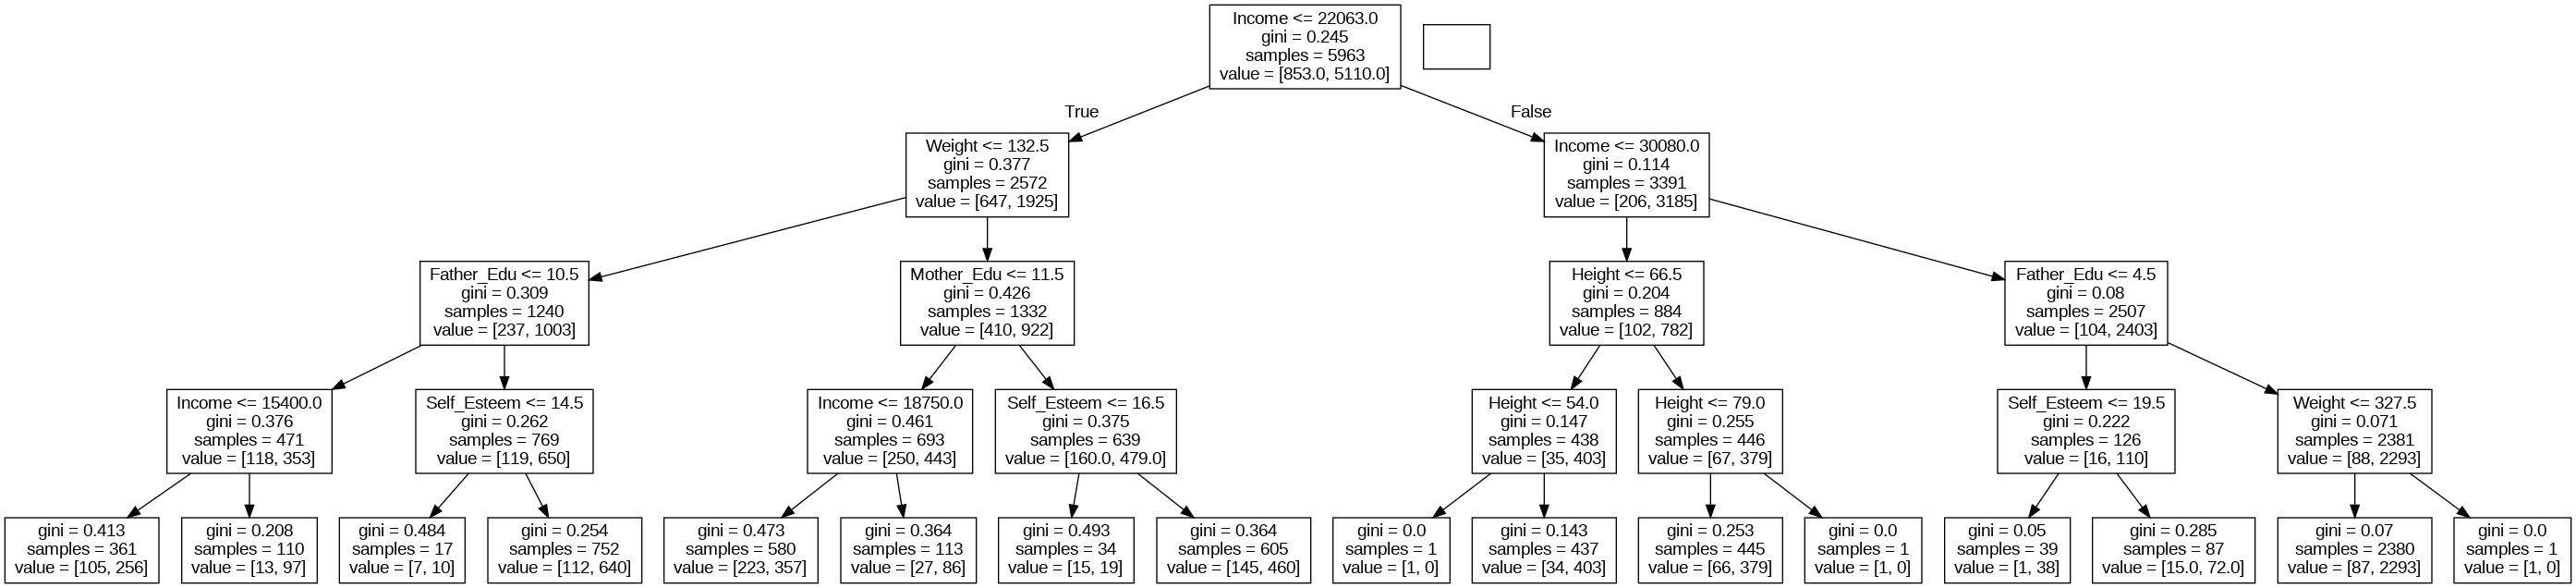

In [ ]:
mar=DecisionTreeClassifier(criterion='gini',max_depth=4)
mar.fit(XD,yd)

vs=['Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Height', 'Weight', 'Income']

dot_data=export_graphviz(mar,feature_names=vs)
graph=graph_from_dot_data(dot_data)
graph.write_png('Parcial1_Arbol.png')
Image(filename='Parcial1_Arbol.png')

In [ ]:
# Total personas:
total_personas = len(XDB)

#Evaluación desempeño del modelo
ydp=mar.predict(XD)
cm=confusion_matrix(yd,ydp)
print(cm)


VN=cm[0,0]; FP=cm[0,1]; FN=cm[1,0]; VP=cm[1,1]

Exactitud=((VP+VN)/(VP+VN+FP+FN)) #Funcionamiento general del modelo
print('La Exactitud del modelo es del',Exactitud)
Sensibilidad=(VP/(VP+FN)) #Como se comporto el modelo con los positivos
print('La Sensibilidad del modelo es del',Sensibilidad)
Especificidad=(VN/(VN+FP)) #Como se comporto el modelo con los 0
print('La Especificidad del modelo es del',Especificidad)
Precision=(VP/(VP+FP)) #Cual es el acierto clasificando los positivos
print('La Precision del modelo es del',Precision)
TasaError=((FP+FN)/(VP+VN+FP+FN)) #Equivocación general
print('La Tasa de Error del modelo es del',TasaError)

[[   3  850]
 [   0 5110]]
La Exactitud del modelo es del 0.8574543015260775
La Sensibilidad del modelo es del 1.0
La Especificidad del modelo es del 0.0035169988276670576
La Precision del modelo es del 0.8573825503355704
La Tasa de Error del modelo es del 0.1425456984739225


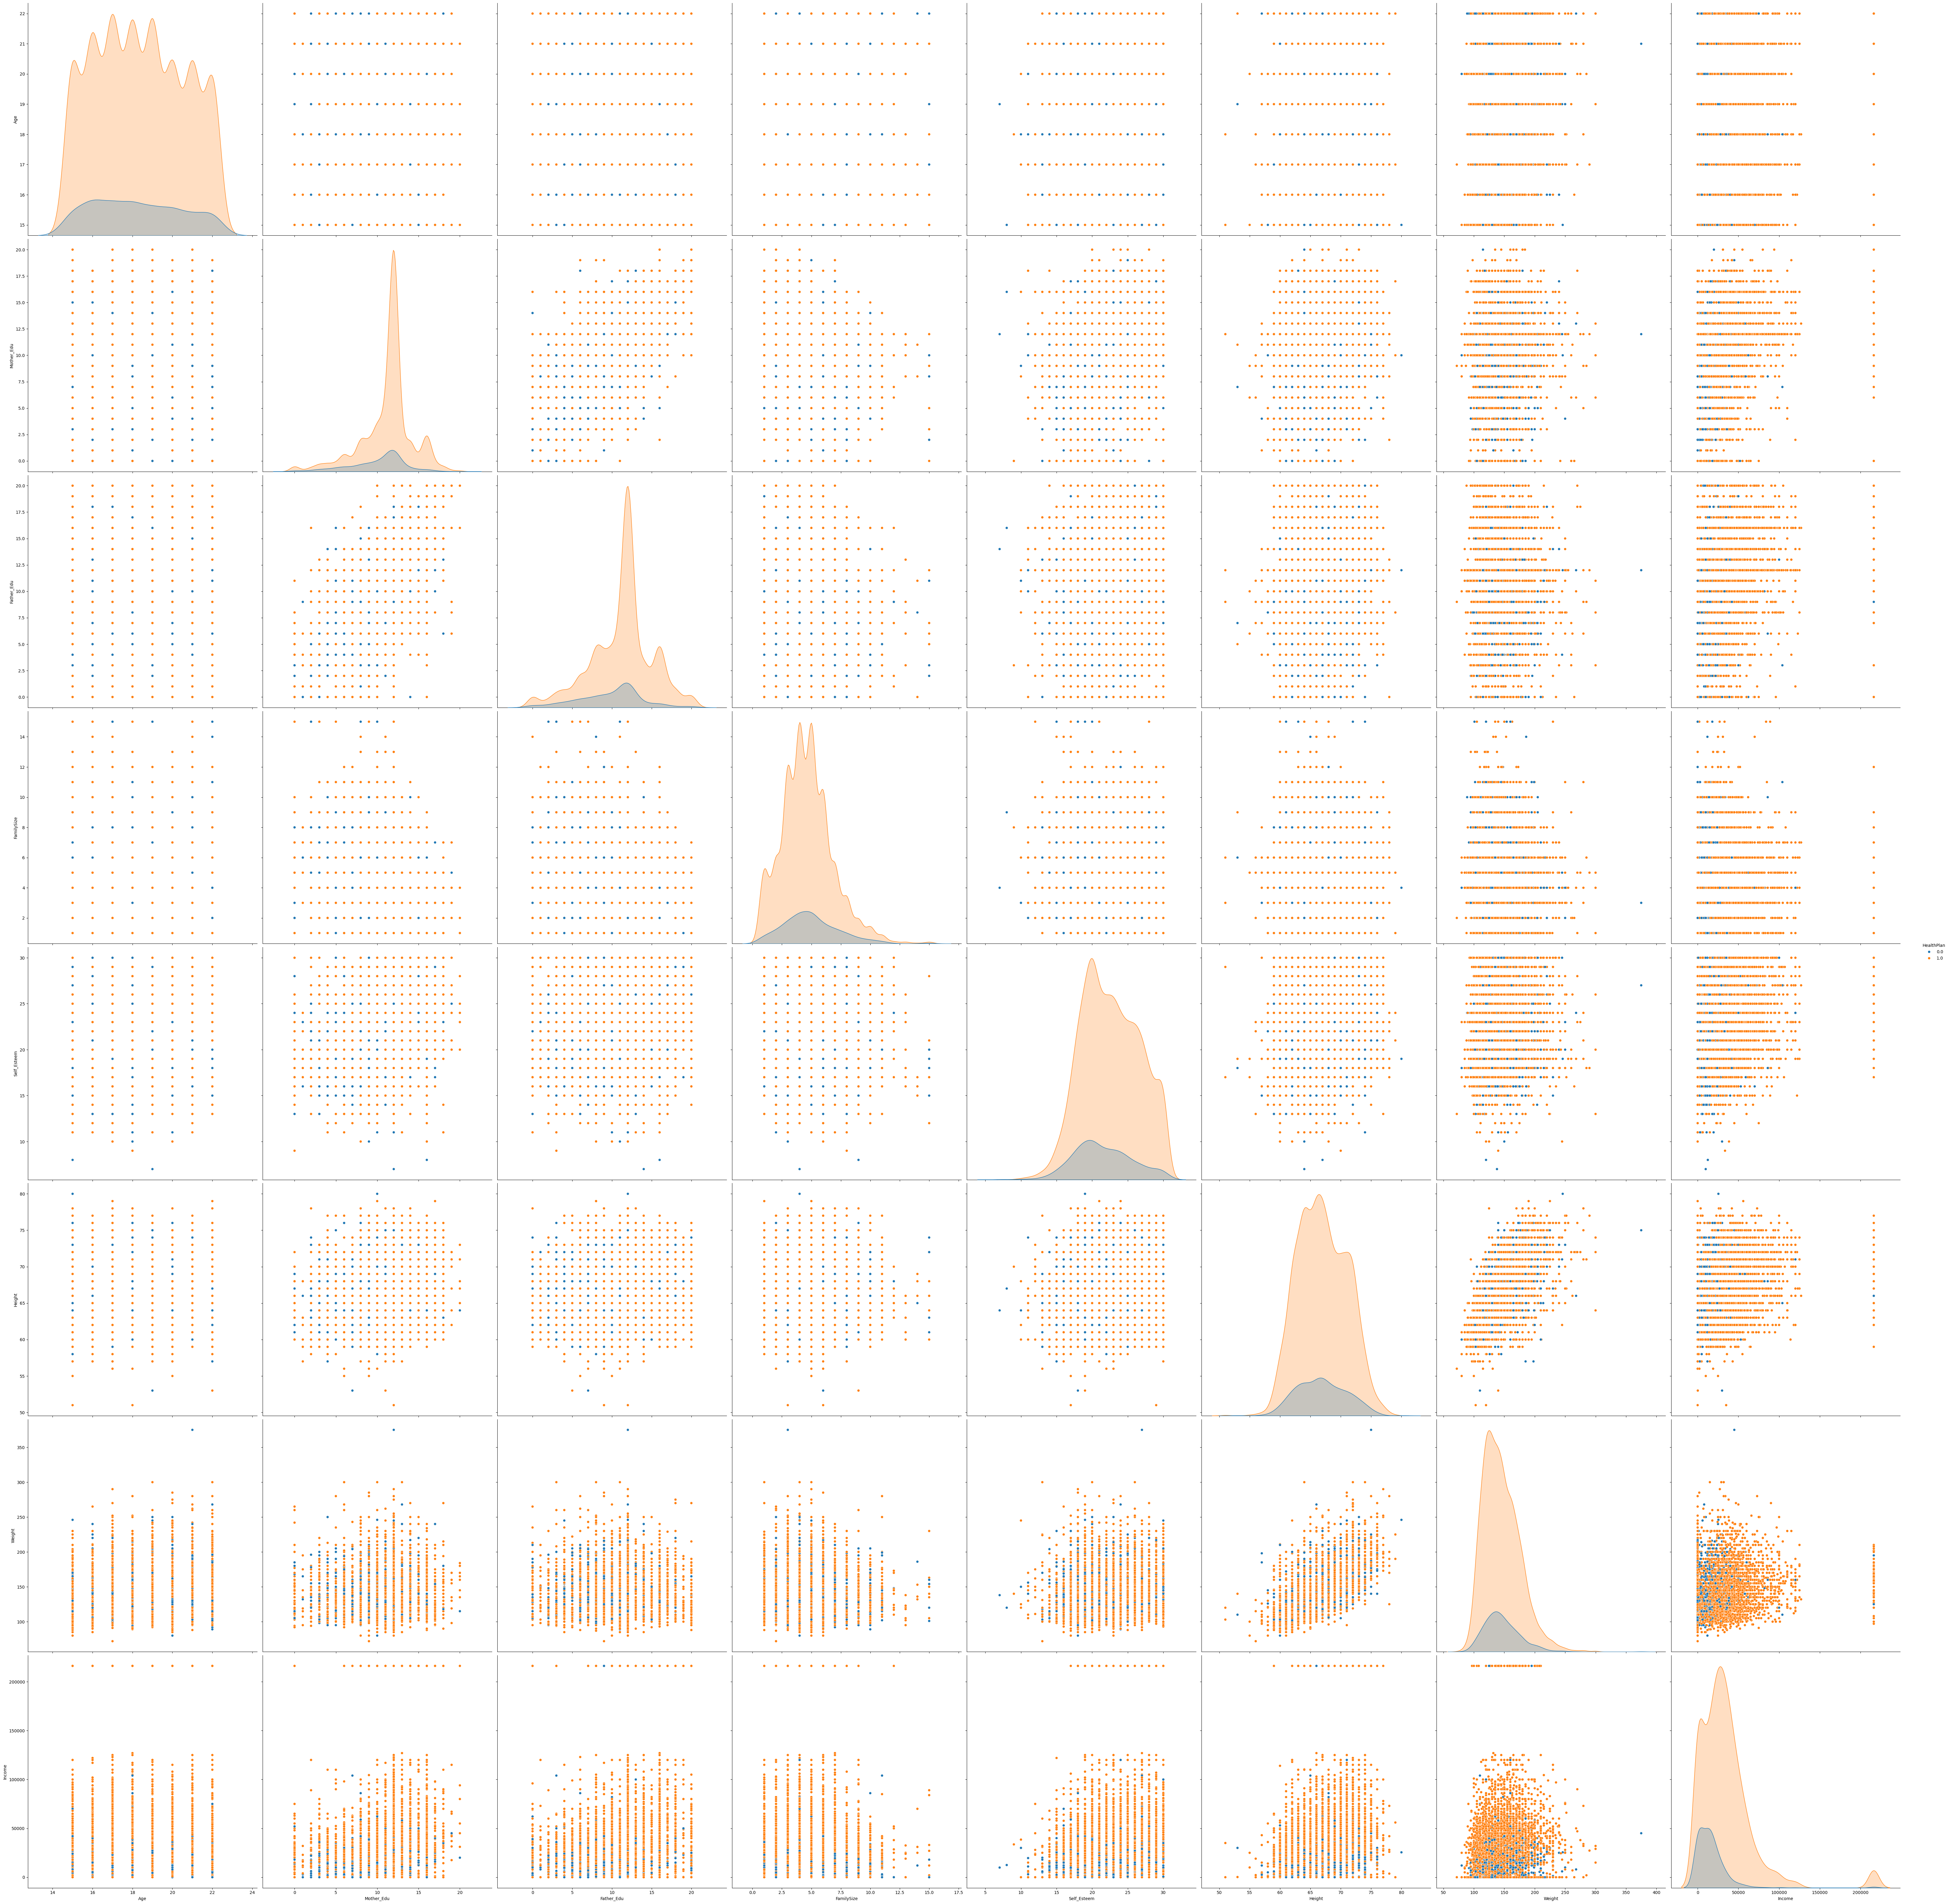

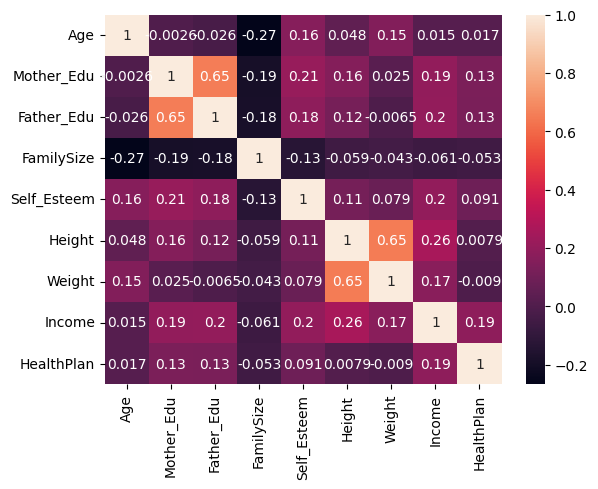

In [ ]:
xl = '/content/4. BD1_Longitudinal Survey_L_Int.xlsx'
XDB=pd.read_excel(nxl, sheet_name=0)
XDB.head()

#variables de trabajo
XDB=XDB[['Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Height', 'Weight', 'Income','HealthPlan']]
XDB=XDB.dropna()

#datos de entrada y salida
XD=np.array(XDB.iloc[:,0:8])
YD=np.array(XDB.iloc[:,8])

#Gráficos de correlación
import seaborn as sns

sns.pairplot(XDB,hue='HealthPlan',height=8,vars=['Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Height', 'Weight', 'Income'])
#Azules:  | Naranjados:
plt.figure()
sns.heatmap(XDB.corr(),annot=True)
plt.show()

HealthPlan     1.000000
Income         0.187573
Mother_Edu     0.131726
Father_Edu     0.127960
Self_Esteem    0.091411
Age            0.016550
Height         0.007911
cluster       -0.002086
Weight        -0.009000
FamilySize    -0.053398
Pronostico          NaN
Name: HealthPlan, dtype: float64


Age  Mother_Edu  Father_Edu  FamilySize  Self_Esteem     Height  \
0  18.352564   11.695869   11.824074    4.502137    23.308405  68.292023   
1  18.383361   10.591343   10.383924    4.854413    21.549185  65.676785   
2  18.632479   13.256410   13.752137    4.324786    24.897436  69.692308   
3  18.340949   10.703866   10.568541    4.750439    22.212214  66.659051   
4  18.348837   12.547804   13.000000    4.426357    24.170543  69.198966   

       Weight         Income  
0  152.443732   49125.363248  
1  139.277122    4246.270377  
2  160.435897  216200.000000  
3  144.007030   25652.303603  
4  155.121447   88203.589147

Los cluster a los que pertenecen las personas son:
 [1 0 3 ... 0 0 3]


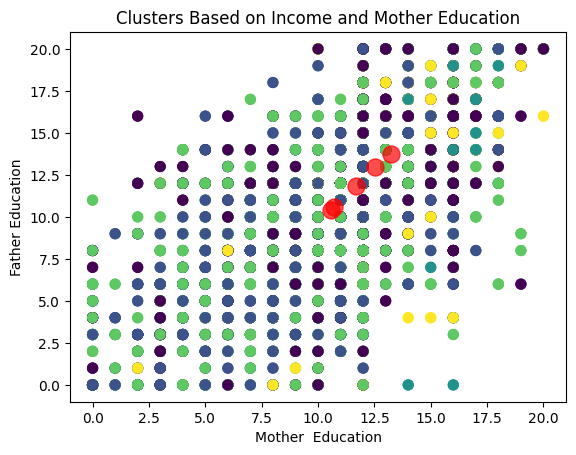

In [ ]:
correlation_matrix = XDB.corr()
healthplan_correlation = correlation_matrix['HealthPlan'].sort_values(ascending=False)
print(healthplan_correlation)

np.random.seed(42)
NC=5
mkm=KMeans(n_clusters=NC,init='random',random_state=42)
mkm.fit(XD,YD)

dfc=pd.DataFrame(mkm.cluster_centers_)
dfc.columns=['Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Height', 'Weight', 'Income']
display(dfc)

ydc=mkm.predict(XD)
print("Los cluster a los que pertenecen las personas son:\n",ydc)

centroids=mkm.cluster_centers_
plt.figure()
plt.scatter(XD[:, XDB.columns.get_loc('Mother_Edu')], XD[:, XDB.columns.get_loc('Father_Edu')], c=ydc, s=50, cmap='viridis')
plt.scatter(XD[:,1],XD[:,2],c=ydc,s=50,cmap='viridis')
plt.scatter(centroids[:, XDB.columns.get_loc('Mother_Edu')], centroids[:, XDB.columns.get_loc('Father_Edu')], c='red', s=150, alpha=0.7)
plt.xlabel('Mother  Education')
plt.ylabel('Father Education')
plt.title('Clusters Based on Income and Mother Education')
plt.show()

In [ ]:
ND=np.bincount(ydc) #total de personas en cada cluster (ND)
XDB['cluster']=ydc #nueva columna a la tabla inicial
display(XDB)

#Npersonas que tienen un plan de salud (HealthPlan = 1) por cluster
NApr=XDB.groupby('cluster').agg({'HealthPlan':lambda x: (x==1).sum()})
#% de personas con un plan de salud en cada cluster (%Apr)
NAprp=np.array(NApr)/ND[:,None]
display(NAprp)

#personas que no tienen un plan de salud (HealthPlan = 0) por cluster
Nneg=XDB.groupby('cluster').agg({'HealthPlan':lambda x: (x==0).sum()})
#personas sin un plan de salud en cada cluster (%Neg)
Nnegp=np.array(Nneg)/ND[:,None]
display(Nnegp)

df2=pd.DataFrame(np.column_stack((ND,NApr,Nneg,NAprp,Nnegp)))
df2.columns=['ND','NApr','Nneg','%Apr','%Neg']
df2.index=['C0','C1','C2','C3','C4']
display(df2)

Age  Mother_Edu  Father_Edu  FamilySize  Self_Esteem  Height  Weight  \
1       20         5.0         8.0           5         16.0    62.0   120.0   
5       19        12.0        12.0           4         27.0    64.0   200.0   
6       15        12.0        12.0           3         26.0    65.0   131.0   
7       21         9.0         6.0           3         23.0    65.0   179.0   
8       16        12.0        10.0           6         26.0    66.0   145.0   
...    ...         ...         ...         ...          ...     ...     ...   
12557   20        12.0        12.0           5         20.0    60.0   110.0   
12565   20        12.0        11.0           2         24.0    63.0   152.0   
12647   21        16.0        12.0           1         30.0    70.0   180.0   
12651   21        16.0        16.0           1         27.0    73.0   170.0   
12678   21         8.0         8.0           1         19.0    70.0   180.0   

        Income  HealthPlan  cluster  
1          0.0         1.0        1  
5      40000.0         1.0        0  
6      25000.0         1.0        3  
7      27400.0         1.0        3  
8      52000.0         1.0        0  
...        ...         ...      ...  
12557   1000.0         1.0        1  
12565  38000.0         1.0        0  
12647  43600.0         1.0        0  
12651  40000.0         1.0        0  
12678  17000.0         1.0        3  

[5963 rows x 10 columns]

array([[0.96367521],
       [0.74198988],
       [0.95726496],
       [0.85544815],
       [0.97674419]])

array([[0.03632479],
       [0.25801012],
       [0.04273504],
       [0.14455185],
       [0.02325581]])

ND    NApr   Nneg      %Apr      %Neg
C0  1404.0  1353.0   51.0  0.963675  0.036325
C1  1779.0  1320.0  459.0  0.741990  0.258010
C2   117.0   112.0    5.0  0.957265  0.042735
C3  2276.0  1947.0  329.0  0.855448  0.144552
C4   387.0   378.0    9.0  0.976744  0.023256

In [ ]:
ydp=np.zeros((len(ydc),1)) #vector pronostico - misma longitud ydc

for k in range(len(ydp)):
  print('La persona:', k)
  print('Pertenece al cluster', ydc[k])
  ncl=ydc[k] #almacenar el número de cluster
  print('Probabilidad de no tener plan de salud :', Nnegp[ncl]) #Porcentaje Neg
  print('Probabilidad de tener plan de salud :', NAprp[ncl]) #Porcentaje Apr

  if NAprp[ncl]>Nnegp[ncl]:
    print("Tiene plan de salud")
    ydp[k]=1
  else:
    print("No tiene plan de salud")
    ydp[k]=0

XDB['Pronostico']=ydp #Adiciono una columna a la tabla original
display(XDB)
XDB.to_excel('InformeCluster.xlsx')
  #Evaluamos la matriz de confusion
cm=confusion_matrix(YD,ydp)
print(cm)

Se truncaron las últimas líneas 5000 del resultado de transmisión.
La persona: 4963
Pertenece al cluster 3
Probabilidad de no tener plan de salud : [0.14455185]
Probabilidad de tener plan de salud : [0.85544815]
Tiene plan de salud
La persona: 4964
Pertenece al cluster 0
Probabilidad de no tener plan de salud : [0.03632479]
Probabilidad de tener plan de salud : [0.96367521]
Tiene plan de salud
La persona: 4965
Pertenece al cluster 1
Probabilidad de no tener plan de salud : [0.25801012]
Probabilidad de tener plan de salud : [0.74198988]
Tiene plan de salud
La persona: 4966
Pertenece al cluster 1
Probabilidad de no tener plan de salud : [0.25801012]
Probabilidad de tener plan de salud : [0.74198988]
Tiene plan de salud
La persona: 4967
Pertenece al cluster 0
Probabilidad de no tener plan de salud : [0.03632479]
Probabilidad de tener plan de salud : [0.96367521]
Tiene plan de salud
La persona: 4968
Pertenece al cluster 3
Probabilidad de no tener plan de salud : [0.14455185]
Probabilidad d

Age  Mother_Edu  Father_Edu  FamilySize  Self_Esteem  Height  Weight  \
1       20         5.0         8.0           5         16.0    62.0   120.0   
5       19        12.0        12.0           4         27.0    64.0   200.0   
6       15        12.0        12.0           3         26.0    65.0   131.0   
7       21         9.0         6.0           3         23.0    65.0   179.0   
8       16        12.0        10.0           6         26.0    66.0   145.0   
...    ...         ...         ...         ...          ...     ...     ...   
12557   20        12.0        12.0           5         20.0    60.0   110.0   
12565   20        12.0        11.0           2         24.0    63.0   152.0   
12647   21        16.0        12.0           1         30.0    70.0   180.0   
12651   21        16.0        16.0           1         27.0    73.0   170.0   
12678   21         8.0         8.0           1         19.0    70.0   180.0   

        Income  HealthPlan  cluster  Pronostico  
1          0.0         1.0        1         1.0  
5      40000.0         1.0        0         1.0  
6      25000.0         1.0        3         1.0  
7      27400.0         1.0        3         1.0  
8      52000.0         1.0        0         1.0  
...        ...         ...      ...         ...  
12557   1000.0         1.0        1         1.0  
12565  38000.0         1.0        0         1.0  
12647  43600.0         1.0        0         1.0  
12651  40000.0         1.0        0         1.0  
12678  17000.0         1.0        3         1.0  

[5963 rows x 11 columns]

[[   0  853]
 [   0 5110]]


In [ ]:
cm=confusion_matrix(YD,ydp) #ydp es aprobación o negación 0,1
print(cm)                   #ydc: Es el cluster de pertenencia 0,1,2,3,4,5


VN=cm[0,0];FP=cm[0,1];FN=cm[1,0];VP=cm[1,1]

Ex=((VN+VP)/(VN+VP+FN+FP))*100
print("La exactitud del modelo es del:",Ex)

TE=((FN+FP)/(VN+VP+FN+FP))*100
print("La tasa de error del modelo es del:",TE)

Sen=(VP/(VP+FN))*100
print("La sensibilidad del modelo es del:",Sen)

Esp=(VN/(VN+FP))*100
print("La especificidad del modelo es del:",Esp)

Pre=(VP/(VP+FP))*100
print("La precisión del modelo es del:",Pre)

Pren=(VN/(VN+FN))*100
print("La precisión negativa del modelo es del:",Pren)

[[   0  853]
 [   0 5110]]
La exactitud del modelo es del: 85.69511990608754
La tasa de error del modelo es del: 14.30488009391246
La sensibilidad del modelo es del: 100.0
La especificidad del modelo es del: 0.0
La precisión del modelo es del: 85.69511990608754
La precisión negativa del modelo es del: nan


<ipython-input-54-45c95e39deea>:22: RuntimeWarning: invalid value encountered in scalar divide
  Pren=(VN/(VN+FN))*100


**ANALISIS DE RESULTADOS**
 para la construccion del modelo se tuvieron un total de 5963 datos, de las cuales el Número de personas inscritas fueron 5110 y el Número de personas no inscritas fue de 853.se calcularon los datos de dos formas una con smote para balancear los datos y que arrojen datos mas exactos y otra sin smote, y los graficos de correlación se hicieron una vez con 5 variables y otra incluyendo todas las variables, para tener dos perspectivas, una mas general y una ams especifica. De acuerdo con los resultados arrojados por el modelo se pudo corroborar en la plataforma colab el comportamiento del modelo naive bayes y el arbol de decisión de acuerdo con el archivo de excel de referencia.  El modelo Naive Bayes alcanzó una exactitud de aproximadamente del 68%,  mientras que el Árbol de Decisión obtuvo una exactitud de 72% aproximadamente. En términos de Especificidad
Naive Bayes logró un 87.27%, lo que significa que identificó correctamente la mayoría de los casos negativos de HealthPlan, mientras que el Árbol de Decisión alcanzó un 63.14%, lo que indica que aún hay margen de mejora en la identificación de casos negativos.Respecto a la Sensibilidad Naive Bayes obtuvo un 51.60%, lo que sugiere que tiene dificultades para identificar correctamente los casos positivosy el Árbol de Decisión logró un 81.83%, lo que indica que es mejor detectando los casos positivos.En cuanto a la Precisión Naive Bayes tuvo un 81.42%, lo que significa que la mayoría de sus predicciones positivas fueron correctas mientras que el Árbol de Decisión alcanzó un 70.59%, indicando que aunque detecta más positivos, también comete más errores en estos casos.El modelo Naive Bayes tiene una Tasa de Error del 31.26%, mientras que el Árbol de Decisión tiene un 27.15%, indicando que el Árbol de Decisión cometió menos errores totales. Finalmente, la Tasa de Predicción Negativa de Naive Bayes fuedel 62.50% y la del Árbol de Decisión del 76.26% Esto sugiere que el Árbol de Decisión es más confiable en predecir correctamente los casos negativos.En general, según la evaluación de todas las métricas, el mejor modelo fue el Árbol de Decisión, ya que obtuvo mejores resultados en la mayoría de las métricas clave
Para llevar a cabo la implementación del  modelo de clusterizacion y Agrupamiento, se tuvo en cuenta las variables: 'Age', 'Mother_Edu', 'Father_Edu', 'FamilySize', 'Self_Esteem', 'Height', 'Weight', 'Income' y como variable explicativa, se tomó la variable healthplan. El modelo utilizado para la segmentación fue el algoritmo K-Means, con el objetivo de identificar patrones de comportamiento dentro del grupo de usuarios y mostrar cuales eran las variables que tenían una mayor correlación entre ellas. En este caso las variables con mas correlación fueron father edu y mother edu con un (65%). Por otro lado la mayor correlación con la variable explicativa fue la variable income (19%). Se puede concluir que el arbol de decisión nos arroja los mejores resultados

